<a href="https://colab.research.google.com/github/ponwinsiya2348539/lab1_ml/blob/main/2348539_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [7]:
df=pd.read_csv('/content/sample_data/Market_Basket_Optimisation.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
2231,milk,eggs,ham,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4394,mineral water,chocolate,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4202,ground beef,spaghetti,mineral water,nonfat milk,honey,pet food,eggplant,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5611,tomatoes,mineral water,salmon,fresh bread,toothpaste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2829,turkey,spaghetti,olive oil,green beans,mint green tea,chocolate,mushroom cream sauce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,flax seed,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,parmesan cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5136,chocolate,french fries,salad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1660,tomato juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

Data preprocessing

In [10]:
df=df.fillna(value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            7500 non-null   object 
 2   avocado            7500 non-null   object 
 3   vegetables mix     7500 non-null   object 
 4   green grapes       7500 non-null   object 
 5   whole weat flour   7500 non-null   object 
 6   yams               7500 non-null   object 
 7   cottage cheese     7500 non-null   object 
 8   energy drink       7500 non-null   object 
 9   tomato juice       7500 non-null   object 
 10  low fat yogurt     7500 non-null   object 
 11  green tea          7500 non-null   object 
 12  honey              7500 non-null   object 
 13  salad              7500 non-null   object 
 14  mineral water      7500 non-null   object 
 15  salmon             7500 non-null   object 
 16  antioxydant juice  7500 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,olive oil
count,7500.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [14]:
data=df.drop(columns = ['olive oil'])
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
transactions = []
for i in range(0,data.shape[0]):
    transactions.append([str(data.values[i,j])for j in range(0,data.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
print(transactions)

[['burgers', 'meatballs', 'eggs', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['chutney', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['turkey', 'avocado', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['low fat yogurt', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['whole wheat pasta', 'french fries', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['soup', 'light cream', 'shallot', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['frozen vegetables', 'spaghetti', 'green tea', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['french fries', '0', '0', '0', '0', '0', '0', '0',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7500, 19)

In [19]:
transactions = []

for i in range(0, data.shape[0]):
    transaction = [str(data.values[i, j]) for j in range(0, data.shape[1]) if str(data.values[i, j]) != '0']
    transactions.append(transaction)

print(transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

In [20]:
unique_items_set = set()
for transaction in transactions:
    unique_items_set.update(item for item in transaction)
unique_items_list = list(unique_items_set)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Converting data into Binary Matrix Forma

In [21]:
binary_matrix = pd.DataFrame(columns=unique_items_list)

# Populate the DataFrame with binary values using pandas.concat
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_items_list]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=unique_items_list)], ignore_index=True)

print(binary_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     bramble energy bar turkey eggplant french wine salt whole wheat rice  \
0          0          0      0        0           0    0                0   
1          0          0      0        0           0    0                0   
2          0          0      1        0           0    0                0   
3          0          1      0        0           0    0                1   
4          0          0      0        0           0    0                0   
...      ...        ...    ...      ...         ...  ...              ...   
7495       0          0      0        0           0    0                0   
7496       0          0      0        0           0    0                0   
7497       0          0      0        0           0    0                0   
7498       0          0      0        0           0    0                0   
7499       0          0      0        0           0    0                0   

     fresh bread low fat yogurt whole weat flour  ... eggs dessert wine  \


In [22]:
top10=binary_matrix.sum().sort_values(ascending=False)[:10]
top10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: object

Exploratory data analysis (EDA)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


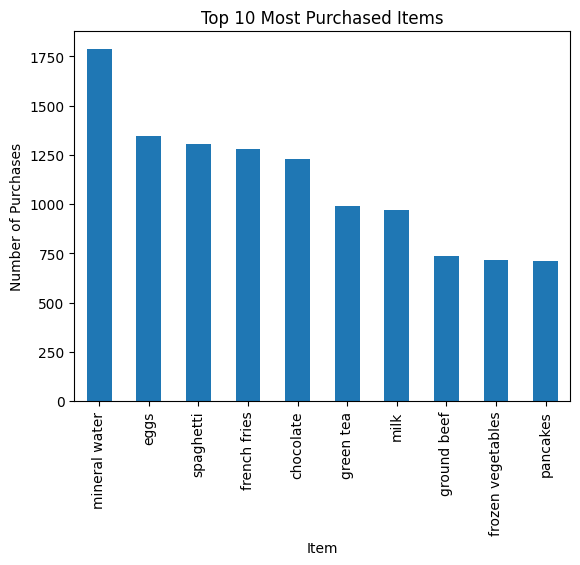

In [23]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


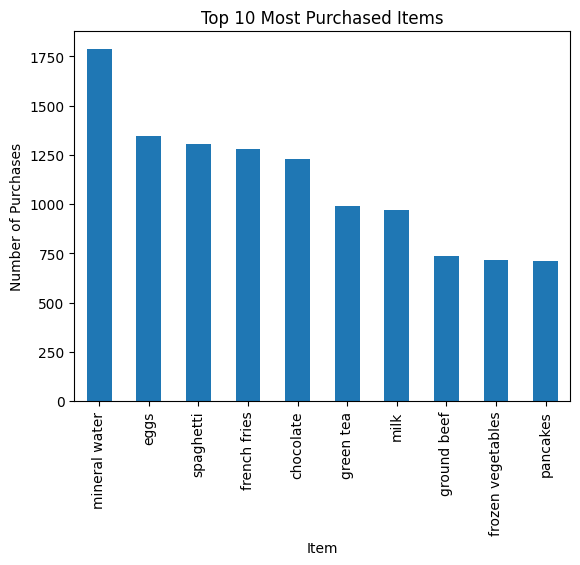

In [24]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


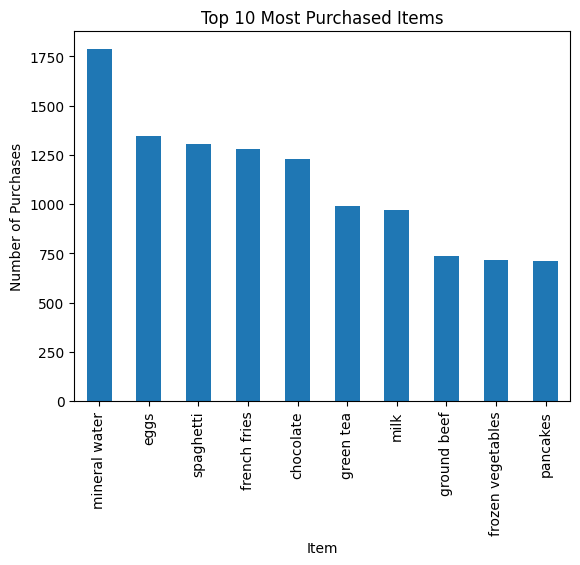

In [30]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

Association Rule Mining

In [31]:
frequent_itemset = apriori(binary_matrix,min_support=0.06,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [32]:
basket=pd.DataFrame(binary_matrix)
frequent_itemset = apriori(basket,min_support=0.03,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules.head()
rules[(rules['confidence']>0.2) & (rules['lift']>1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433,0.402718
2,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812,0.409789
3,(mineral water),(milk),0.238267,0.129600,0.048000,0.201455,1.554436,0.017121,1.089982,0.468248
4,(milk),(chocolate),0.129600,0.163867,0.032133,0.247942,1.513074,0.010896,1.111794,0.389584
6,(milk),(eggs),0.129600,0.179733,0.030800,0.237654,1.322261,0.007507,1.075977,0.280009
8,(spaghetti),(milk),0.174133,0.129600,0.035467,0.203675,1.571569,0.012899,1.093022,0.440378
9,(milk),(spaghetti),0.129600,0.174133,0.035467,0.273663,1.571569,0.012899,1.137029,0.417846
10,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576,0.474647
12,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
13,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566


In [33]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('Worst choice to buy items together')
print(worst_choice[['antecedents','consequents','lift']])

Worst choice to buy items together
            antecedents          consequents      lift
22          (chocolate)               (eggs)  1.127246
23               (eggs)          (chocolate)  1.127246
31               (eggs)          (spaghetti)  1.167290
30          (spaghetti)               (eggs)  1.167290
29       (french fries)               (eggs)  1.184803
28               (eggs)       (french fries)  1.184803
16      (mineral water)               (eggs)  1.189351
17               (eggs)      (mineral water)  1.189351
25       (french fries)          (chocolate)  1.228121
24          (chocolate)       (french fries)  1.228121
7                (eggs)               (milk)  1.322261
6                (milk)               (eggs)  1.322261
12          (chocolate)      (mineral water)  1.348907
13      (mineral water)          (chocolate)  1.348907
26          (spaghetti)          (chocolate)  1.373768
27          (chocolate)          (spaghetti)  1.373768
19      (mineral water)       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
            antecedents          consequents  confidence      lift
10        (ground beef)      (mineral water)    0.416554  1.748266
21        (ground beef)          (spaghetti)    0.398915  2.290857
1   (frozen vegetables)      (mineral water)    0.374825  1.573133
2                (milk)      (mineral water)    0.370370  1.554436
14           (pancakes)      (mineral water)    0.354839  1.489250
18          (spaghetti)      (mineral water)    0.343032  1.439698
12          (chocolate)      (mineral water)    0.321400  1.348907
17               (eggs)      (mineral water)    0.283383  1.189351
9                (milk)          (spaghetti)    0.273663  1.571569
19      (mineral water)          (spaghetti)    0.250699  1.439698
4                (milk)          (chocolate)    0.247942  1.513074
27          (chocolate)          (spaghetti)    0.239219  1.373768
6                (milk)               (eggs)    0.237654  1.322261
20          (spaghetti)     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
top=best_choice.head(10)
print(top)

            antecedents      consequents  antecedent support  \
10        (ground beef)  (mineral water)            0.098267   
21        (ground beef)      (spaghetti)            0.098267   
1   (frozen vegetables)  (mineral water)            0.095333   
2                (milk)  (mineral water)            0.129600   
14           (pancakes)  (mineral water)            0.095067   
18          (spaghetti)  (mineral water)            0.174133   
12          (chocolate)  (mineral water)            0.163867   
17               (eggs)  (mineral water)            0.179733   
9                (milk)      (spaghetti)            0.129600   
19      (mineral water)      (spaghetti)            0.238267   

    consequent support   support  confidence      lift  leverage  conviction  \
10            0.238267  0.040933    0.416554  1.748266  0.017520    1.305576   
21            0.174133  0.039200    0.398915  2.290857  0.022088    1.373959   
1             0.238267  0.035733    0.374825  1.573133 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


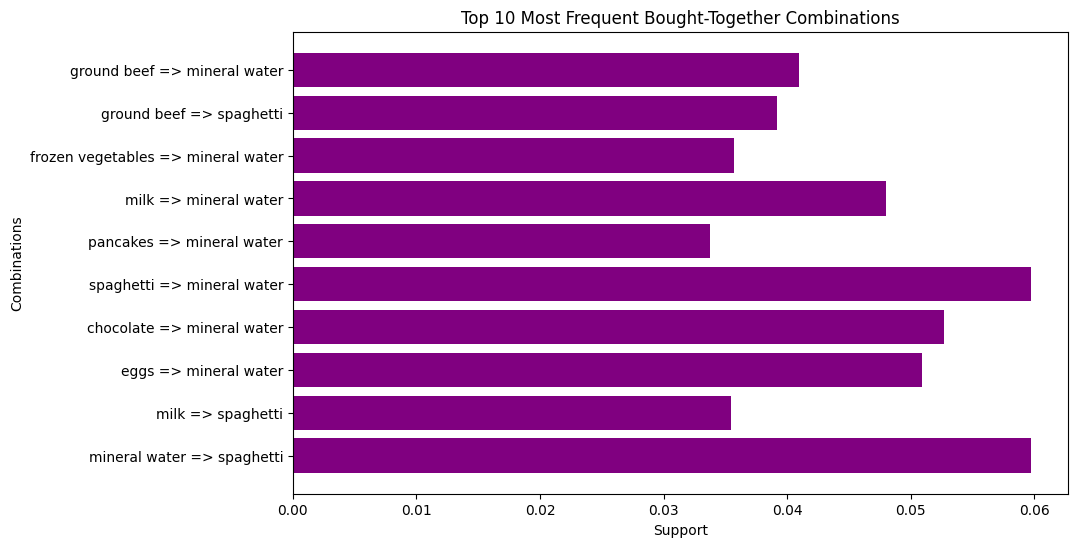

In [37]:
# Extract antecedents and consequents
antecedents = top['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = top['consequents'].apply(lambda x: ', '.join(list(x)))

# Combine antecedents and consequents for the bar labels
bar_labels = antecedents + ' => ' + consequents

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(bar_labels, top['support'], color='purple')
plt.xlabel('Support')
plt.ylabel('Combinations')
plt.title('Top 10 Most Frequent Bought-Together Combinations')
plt.gca().invert_yaxis()
# Invert y-axis to have the highest support at the top
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


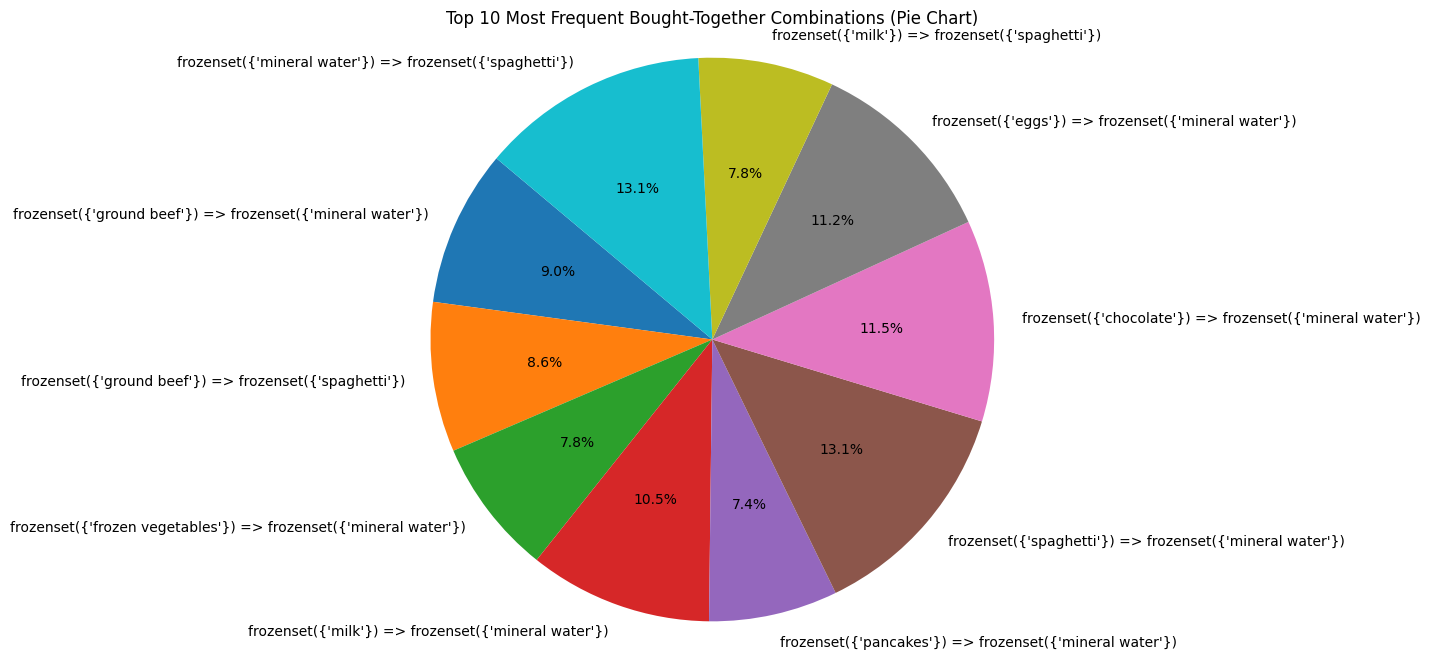

In [38]:
# Sample data (replace with your actual data)
top10 = best_choice.head(10)
combinations = [' => '.join(map(str, combination)) for combination in zip(top10['antecedents'], top10['consequents'])]
support_values = top10['support']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(support_values, labels=combinations, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Most Frequent Bought-Together Combinations (Pie Chart)')
plt.show()